# 03. 하위 단어 토큰화

컴퓨터가 자연어를 인간이 이해하는 방식과 비슷하게 처리할 수 있게 하려면 형태소 단위의 토큰화가 효율적이다

그러나 언어는 시간에 따라 변하고 새로운 단어나 표현이 등장하며 현대 일상 언어에서는 맞춤법이나 띄어쓰기가 엄격하게 지켜지지 않는 경우가 많고 신조어나 고유어 등이 빈번하게 일어난다

형태소 분석기는 전문 용어나 고유어가 많은 데이터를 처리할 때 약점을 보인다

즉 형태소 분석기는 모르는 단어를 적절한 단위로 나누는 것에 취약하며, 이는 잠재적으로 어휘 사전의 크기를 크게 만들고 불용어에 대응하기 어렵게 만든다



현대 자연어 처리에서는 신조어의 발생, 오탈자, 축약어 등을 고려해야 하기 때문에 분석할 단어의 양이 많아져 어려움을 겪는다

이를 해결하기 위한 방법 중 하나로 하위 단어 토큰화(subword Tokenization)가 있다

하위 단어 토큰화란 하나의 단어가 빈번하게 사용되는 하위 단어의 조합으로 나누어 토큰화하는 방법이다

하위 단어 토큰화를 적용하면 단어의 길이를 줄일 수 있어서 처리속도가 빨라질 뿐 아니라 불용어 문제, 신조어, 은어, 고유어 등으로 인한 문제를 완화할 수 있다

### 바이트 페어 인코딩(Byte Pair Encoding, BPE)

다이그램 코딩이라고도 하며 하위 단어 토큰화의 한 종류다

텍스트 데이터에서 가장 빈번하게 등장하는 글자 쌍의 조합을 찾아 부호화하는 압축 알고리즘으로 초기에는 데이터 압축을 위해 개발됐으나, 자연어 처리 분야에서 하위 단어 토큰화를 위한 방법으로 사용된다

연속된 글자 쌍이 더 이상 나타나지 않거나 정해진 어휘 사전 크기에 도달할 때 까지 조합 탐지와 부호화를 반복하며 이 과정에서 자주 등장하는 단어는 하나의 토큰으로 토큰화 되고 덜 등장하는 단어는 여러 토큰의 조합으로 표현된다

바이트 페어 인코딩은 입력 데이터에서 가장 많이 등장한 글자의 빈도수를 측정하고 가장 빈도수가 높은 글자 쌍을 탐색한다

#### 센텐스피스

구글에서 개발한 오픈소스 하위 단어 토크나이저 라이브러리다

바이트 페어 인코딩과 유사한 알고리즘을 사용해  입력 데이터를 토큰화 하고 단어 사전을 생성한다

또한 워드피스, 유니코드 기반의 다양한 알고리즘을 지원하며 사용자가 직접 설정할 수 있는 하이퍼파라미터들을 제공해 세밀한 토크나이징 기능을 제공한다

#### 청와대 청원 데이터 다운로드

In [19]:
from Korpora import Korpora


corpus = Korpora.load("korean_petitions")
dataset = corpus.train
petition = dataset[0]

print("청원 시작일 :", petition.begin)
print("청원 종료일 :", petition.end)
print("청원 동의 수 :", petition.num_agree)
print("청원 범주 :", petition.category)
print("청원 제목 :", petition.title)
print("청원 본문 :", petition.text[:30])


    Korpora 는 다른 분들이 연구 목적으로 공유해주신 말뭉치들을
    손쉽게 다운로드, 사용할 수 있는 기능만을 제공합니다.

    말뭉치들을 공유해 주신 분들에게 감사드리며, 각 말뭉치 별 설명과 라이센스를 공유 드립니다.
    해당 말뭉치에 대해 자세히 알고 싶으신 분은 아래의 description 을 참고,
    해당 말뭉치를 연구/상용의 목적으로 이용하실 때에는 아래의 라이센스를 참고해 주시기 바랍니다.

    # Description
    Author : Hyunjoong Kim lovit@github
    Repository : https://github.com/lovit/petitions_archive
    References :

    청와대 국민청원 게시판의 데이터를 월별로 수집한 것입니다.
    청원은 게시판에 글을 올린 뒤, 한달 간 청원이 진행됩니다.
    수집되는 데이터는 청원종료가 된 이후의 데이터이며, 청원 내 댓글은 수집되지 않습니다.
    단 청원의 동의 개수는 수집됩니다.
    자세한 내용은 위의 repository를 참고하세요.

    # License
    CC0 1.0 Universal (CC0 1.0) Public Domain Dedication
    Details in https://creativecommons.org/publicdomain/zero/1.0/

[Korpora] Corpus `korean_petitions` is already installed at C:\Users\yjpak\Korpora\korean_petitions\petitions_2017-08
[Korpora] Corpus `korean_petitions` is already installed at C:\Users\yjpak\Korpora\korean_petitions\petitions_2017-09
[Korpora] Corpus `korean_petitions` is already installed at 

#### 학습 데이터 세트 생성

In [20]:
from Korpora import Korpora


corpus = Korpora.load("korean_petitions")
petitions = corpus.get_all_texts()
with open("corpus.txt", "w", encoding="utf-8") as f:
    for petition in petitions:
        f.write(petition + "\n")


    Korpora 는 다른 분들이 연구 목적으로 공유해주신 말뭉치들을
    손쉽게 다운로드, 사용할 수 있는 기능만을 제공합니다.

    말뭉치들을 공유해 주신 분들에게 감사드리며, 각 말뭉치 별 설명과 라이센스를 공유 드립니다.
    해당 말뭉치에 대해 자세히 알고 싶으신 분은 아래의 description 을 참고,
    해당 말뭉치를 연구/상용의 목적으로 이용하실 때에는 아래의 라이센스를 참고해 주시기 바랍니다.

    # Description
    Author : Hyunjoong Kim lovit@github
    Repository : https://github.com/lovit/petitions_archive
    References :

    청와대 국민청원 게시판의 데이터를 월별로 수집한 것입니다.
    청원은 게시판에 글을 올린 뒤, 한달 간 청원이 진행됩니다.
    수집되는 데이터는 청원종료가 된 이후의 데이터이며, 청원 내 댓글은 수집되지 않습니다.
    단 청원의 동의 개수는 수집됩니다.
    자세한 내용은 위의 repository를 참고하세요.

    # License
    CC0 1.0 Universal (CC0 1.0) Public Domain Dedication
    Details in https://creativecommons.org/publicdomain/zero/1.0/

[Korpora] Corpus `korean_petitions` is already installed at C:\Users\yjpak\Korpora\korean_petitions\petitions_2017-08
[Korpora] Corpus `korean_petitions` is already installed at C:\Users\yjpak\Korpora\korean_petitions\petitions_2017-09
[Korpora] Corpus `korean_petitions` is already installed at 

#### 토크나이저 모델 학습

In [21]:
from sentencepiece import SentencePieceTrainer


SentencePieceTrainer.Train(
    "--input=corpus.txt\
    --model_prefix=petition_bpe\
    --vocab_size=8000 model_type=bpe"
)

model 파일은 학습된 토크나이저가 저장된 파일이며 vocab파일은 어휘 사전이 저장된 파일이다

#### 바이트 페어 인코딩 토큰화

In [24]:
from sentencepiece import SentencePieceProcessor


tokenizer = SentencePieceProcessor()
tokenizer.load("petition_bpe.model")

sentence = "안녕하세요, 토크나이저가 잘 학습되었군요!"
sentences = ["이렇게 입력값을 리스트로 받아서", "쉽게 토크나이저를 사용할 수 있답니다"]

tokenized_sentence = tokenizer.encode_as_pieces(sentence)
tokenized_sentences = tokenizer.encode_as_pieces(sentences)
print("단일 문장 토큰화 :", tokenized_sentence)
print("여러 문장 토큰화 :", tokenized_sentences)

encoded_sentence = tokenizer.encode_as_ids(sentence)
encoded_sentences = tokenizer.encode_as_ids(sentences)
print("단일 문장 정수 인코딩 :", encoded_sentence)
print("여러 문장 정수 인코딩 :", encoded_sentences)

decode_ids = tokenizer.decode_ids(encoded_sentences)
decode_pieces = tokenizer.decode_pieces(encoded_sentences)
print("정수 인코딩에서 문장 변환 :", decode_ids)
print("하위 단어 토큰에서 문장 변환 :", decode_pieces)

단일 문장 토큰화 : ['▁안녕하세요', ',', '▁토', '크', '나', '이', '저', '가', '▁잘', '▁학', '습', '되었', '군요', '!']
여러 문장 토큰화 : [['▁이렇게', '▁입', '력', '값을', '▁리', '스트', '로', '▁받아서'], ['▁쉽게', '▁토', '크', '나', '이', '저', '를', '▁사용할', '▁수', '▁있', '답니다']]
단일 문장 정수 인코딩 : [667, 6553, 994, 6880, 6544, 6513, 6590, 6523, 161, 110, 6554, 872, 787, 6648]
여러 문장 정수 인코딩 : [[372, 182, 6677, 4433, 1772, 1613, 6527, 4162], [1681, 994, 6880, 6544, 6513, 6590, 6536, 5852, 19, 5, 2639]]
정수 인코딩에서 문장 변환 : ['이렇게 입력값을 리스트로 받아서', '쉽게 토크나이저를 사용할 수 있답니다']
하위 단어 토큰에서 문장 변환 : ['이렇게 입력값을 리스트로 받아서', '쉽게 토크나이저를 사용할 수 있답니다']


encode_as_pieces는 문장을 토큰화 하며 encode_as_ids는 토큰을 정수로 인코딩 해 제공한다

이 정수 데이터는 어휘 사전의 토큰에 매핑된 ID 값을 의미한다 이 ID값을 활용해 자연어 처리 모델을 구축한다

토크나이저 모델이나 자연어 처리 모델에서 나온 정수는 decode_ids나 decode_pieces를 통해 문자열 데이터로 변환할 수 있다

In [26]:
from sentencepiece import SentencePieceProcessor


tokenizer = SentencePieceProcessor()
tokenizer.load("petition_bpe.model")

vocab = {idx: tokenizer.id_to_piece(idx) for idx in range(tokenizer.get_piece_size())}
print(list(vocab.items())[:5])
print("vocab size :", len(vocab))

[(0, '<unk>'), (1, '<s>'), (2, '</s>'), (3, '니다'), (4, '▁이')]
vocab size : 8000


get_piece_size는 센텐스피스 모델에서 생성된 하위 단어의 개수를 반환하며 id_to_piece는 정숫값을 하위 단어로 변환하는 메서드다

그러므로 하위 단어의 개수만큼 반복해 하위 단어 딕셔너리를 구성한다

### 워드피스(Wordpiece)

바이트 페어 인코딩 토크나이저와 유사한 방법으로 학습되지만 빈도 기반이 아닌 확률 기반으로 글자 쌍을 병합한다

학습 과정에서 확률적인 정보를 사용한다

모델이 새로운 하위 단어를 생성할 때 이전 하위 단어와 함께 나타날 확률을 계산해 가장 높은 확률을 가진 하위 단어를 선택한다

이렇게 선택된 하위 단어는 더 높은 확률로 선택될 가능성이 높으며, 이를 통해 모델이 좀 더 정확한 하위 단어로 분리할 수 있다

워드피스 토크나이저는 바이트 페어 인코딩 토크나이저와 마찬가지로 위 과정을 반복해 연속된 글자 쌍이 더 이상 나타나지 않거나 정해진 어휘 사전 크기에 도달할 때까지 학습한다

#### 토크나이저스

토크나이저스 라이브러리의 워드피스 API를 이용하면 쉽고 빠르게 토크나이저를 구현하고 학습할 수 있다

토크나이저스 라이브러리는 정규화와 사전 토큰화를 제공한다

정규화는 일관된 형식으로 텍스트를 표준화 하고 모호한 경우를 방지하기 위해 일부 문자를 대체하거나 제거하는 등의 작업을 수행한다

불필요한 공백 제거, 대소문자 변환, 유니코드 정규화, 구두점 처리, 특수 문자 처리 등을 제공한다

사전 토큰화는 입력 문장을 토큰화하기 전에 단어와 같은 작은 단위로 나누는 기능을 제공한다

공백 혹은 구두점을 기준으로 입력 문장을 나눠 텍스트 데이터를 효율적으로 처리하고 모델의 성능을 향상시킬 수 있다

#### 워드피스 토크나이저 학습

In [ ]:
from tokenizers import Tokenizer
from tokenizers.models import WordPiece
from tokenizers.normalizers import Sequence, NFD, Lowercase
from tokenizers.pre_tokenizers import Whitespace


tokenizer = Tokenizer(WordPiece())
tokenizer.normalizer = Sequence([NFD(), Lowercase()])
tokenizer.pre_tokenizer = Whitespace()

tokenizer.train(["corpus.txt"])
tokenizer.save("petition_wordpiece.json")

정규화 방식은 normalizers 모듈에 포함된 클래스를 불러와 시퀀스 형식으로 인스턴스를 전달한다

사전 토큰화 방식도 pre_tokenizer 모듈에 포함된 클래스를 불러와 적용한다

#### 정규화 클래스

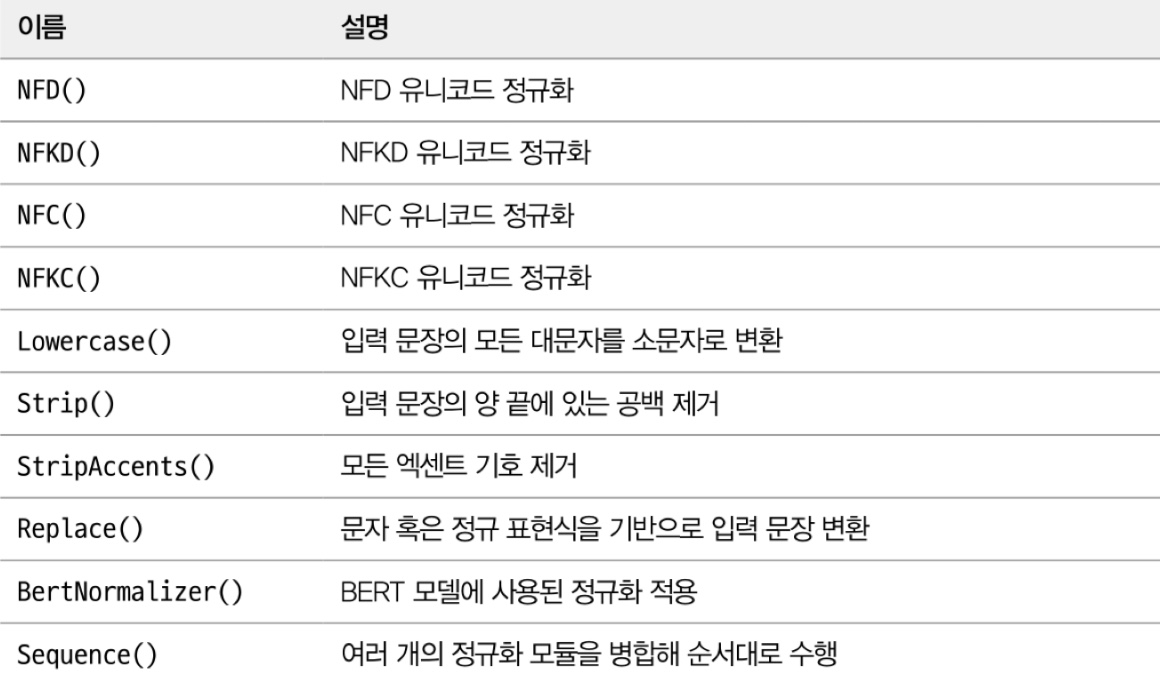

#### 사전 토큰화 클래스

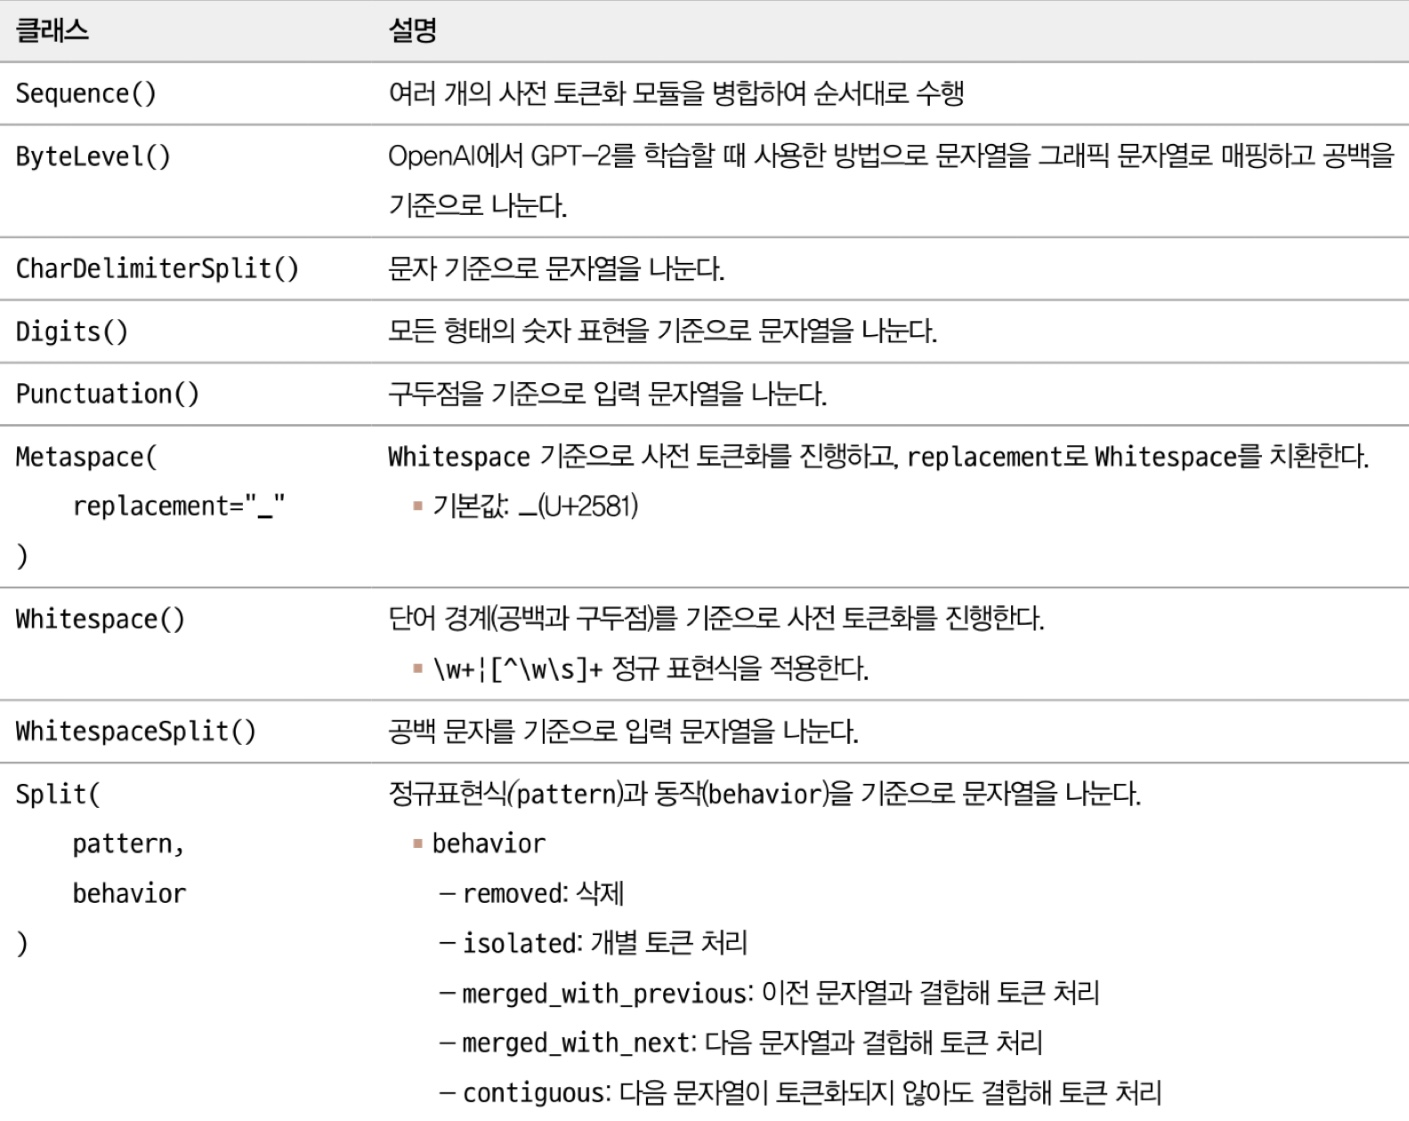

#### 워드피스 토큰화

In [29]:
from tokenizers import Tokenizer
from tokenizers.decoders import WordPiece as WordPieceDecoder


tokenizer = Tokenizer.from_file("petition_wordpiece.json")
tokenizer.decoder = WordPieceDecoder()

sentence = "안녕하세요, 토크나이저가 잘 학습되었군요!"
sentences = ["이렇게 입력값을 리스트로 받아서", "쉽게 토크나이저를 사용할 수 있답니다"]

encoded_sentence = tokenizer.encode(sentence)
encoded_sentences = tokenizer.encode_batch(sentences)

print("인코더 형식 :", type(encoded_sentence))

print("단일 문장 토큰화 :", encoded_sentence.tokens)
print("여러 문장 토큰화 :", [enc.tokens for enc in encoded_sentences])

print("단일 문장 정수 인코딩 :", encoded_sentence.ids)
print("여러 문장 정수 인코딩 :", [enc.ids for enc in encoded_sentences])

print("정수 인코딩에서 문장 변환 :", tokenizer.decode(encoded_sentence.ids))

인코더 형식 : <class 'tokenizers.Encoding'>
단일 문장 토큰화 : ['안녕하세요', ',', '토', '##크', '##나이', '##저', '##가', '잘', '학습', '##되었', '##군요', '!']
여러 문장 토큰화 : [['이렇게', '입력', '##값을', '리스트', '##로', '받아서'], ['쉽게', '토', '##크', '##나이', '##저', '##를', '사용할', '수', '있다', '##ᆸ니다']]
단일 문장 정수 인코딩 : [8760, 11, 8693, 8415, 16269, 7536, 7488, 7842, 15016, 8670, 8734, 0]
여러 문장 정수 인코딩 : [[8187, 19643, 13834, 28119, 7495, 12607], [9739, 8693, 8415, 16269, 7536, 7510, 14129, 7562, 8157, 7489]]
정수 인코딩에서 문장 변환 : 안녕하세요, 토크나이저가 잘 학습되었군요!


최근 연구 동향은 더 큰 말뭉치를 이용해 모델을 학습하고 oov의 위험을 줄이기 위해 하위 단어 토큰화를 사용한다